In [42]:
# ! pip install fastai

In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'test_images', 'train.csv', 'sample_submission.csv', 'train_images']


In [44]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [45]:
from fastai.metrics import error_rate
from fastai.vision import *

In [46]:
"""
- specify the path with all .csv files and train/test images folders
"""
path = Path("../input")
path.ls()

[PosixPath('../input/test.csv'),
 PosixPath('../input/test_images'),
 PosixPath('../input/train.csv'),
 PosixPath('../input/sample_submission.csv'),
 PosixPath('../input/train_images')]

In [47]:
(path/'train_images').ls()

[PosixPath('../input/train_images/a87f53bc984a.png'),
 PosixPath('../input/train_images/22ce8ef69357.png'),
 PosixPath('../input/train_images/bdc6c60e9133.png'),
 PosixPath('../input/train_images/093a42649c29.png'),
 PosixPath('../input/train_images/84a72e15b23c.png'),
 PosixPath('../input/train_images/f6d760566a51.png'),
 PosixPath('../input/train_images/14e3f84445f7.png'),
 PosixPath('../input/train_images/3694e8c8e09a.png'),
 PosixPath('../input/train_images/7f43becd3e83.png'),
 PosixPath('../input/train_images/67ed8cc78b97.png'),
 PosixPath('../input/train_images/10eefba568dd.png'),
 PosixPath('../input/train_images/bf9cba745efc.png'),
 PosixPath('../input/train_images/81914ceb4e74.png'),
 PosixPath('../input/train_images/7e77b61e1639.png'),
 PosixPath('../input/train_images/ff8a0b45c789.png'),
 PosixPath('../input/train_images/c12e9ca420a5.png'),
 PosixPath('../input/train_images/75a4343b12f9.png'),
 PosixPath('../input/train_images/a0e635689259.png'),
 PosixPath('../input/train_i

In [48]:
path_img = path/'train_images'

In [49]:
"""
- display some images
"""
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('../input/train_images/a87f53bc984a.png'),
 PosixPath('../input/train_images/22ce8ef69357.png'),
 PosixPath('../input/train_images/bdc6c60e9133.png'),
 PosixPath('../input/train_images/093a42649c29.png'),
 PosixPath('../input/train_images/84a72e15b23c.png')]

In [50]:
df = pd.read_csv(path/'train.csv')
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [51]:
"""
- perform images transformation
"""
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [52]:
"""
- Used ImageList insted of ImageItemList. ImageItemList returned a error.
- no specific argument for .label_from_df()
"""

np.random.seed(42)
src = (ImageList.from_csv(path, 'train.csv', folder='train_images', suffix='.png')
       .random_split_by_pct(0.2)
       .label_from_df())

/opt/conda/lib/python3.6/site-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [53]:
"""
- apply tranfsormation with size = 128
"""
data = (src.transform(tfms, size=128)
        .databunch(num_workers=0).normalize(imagenet_stats))

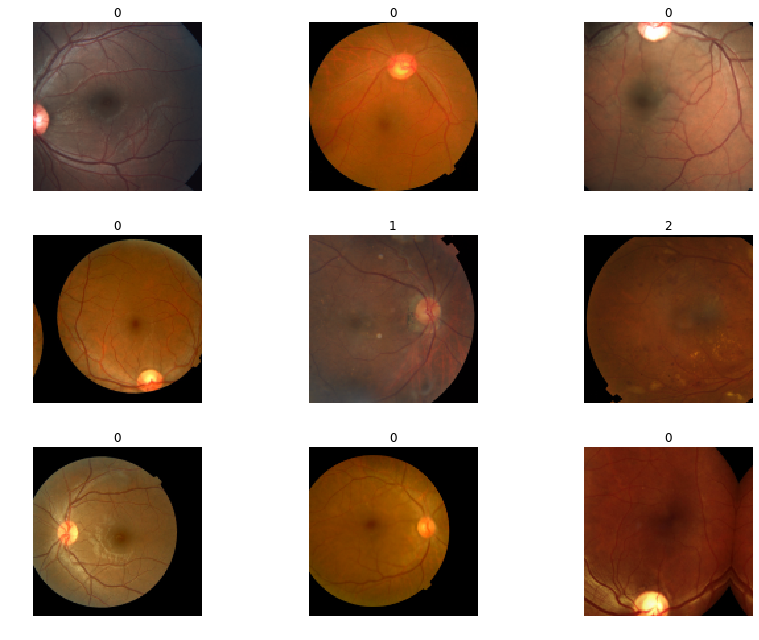

In [54]:
data.show_batch(rows=3, figsize=(12,9))

In [62]:
"""
- for this particular challange Quadratic Kappa score is used: https://docs.fast.ai/metrics.html
"""
kappa = KappaScore()
kappa.weights = "quadratic"

In [59]:
"""
- specify the directory, where the model will be stored: '/kaggle'
"""
learn = cnn_learner(data, base_arch=models.resnet50 ,metrics=[accuracy,kappa],model_dir='/kaggle',pretrained=True)

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


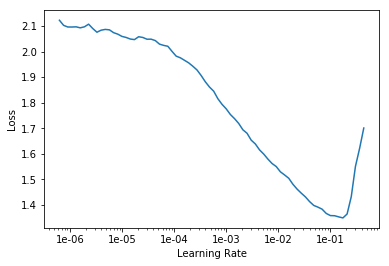

In [61]:
learn.recorder.plot()

Fitting the head of network.

In [64]:
lr = 1e-2
learn.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,0.924695,0.788310,0.695355,0.701388,10:59
1,0.762263,0.683783,0.782787,0.773467,11:01
2,0.678572,0.629552,0.780055,0.812184,11:02
